In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../data/processed/Brazil/census_data/2010/weightening_area/universal_results/states/RS/'

In [10]:
categorie = 'Entorno.csv'
data = pd.read_csv(path+categorie)
data.head()

,Cod_ap,CD_GEOCODM,NM_MUNICIP,V001,V002,V003,V004,V005,V006,V007,...,V1053,V1054,V1055,V1056,V1057,V1058,V1059,V1060,V1061,V1062
0,4.300034e+12,4300034,ACEGUÁ,1397,1,226,1,64,0,22,...,0,847,0,137,0,6,0,69,0,0
1,4.300059e+12,4300059,ÁGUA SANTA,1152,124,265,18,40,7,23,...,25,1176,0,8,0,3,7,200,1,17
2,4.300109e+12,4300109,AGUDO,5425,150,1640,77,391,11,136,...,106,5624,32,225,4,43,44,714,0,0
3,4.300208e+12,4300208,AJURICABA,2456,200,935,83,124,18,56,...,0,3306,0,94,0,9,0,686,0,3
4,4.300307e+12,4300307,ALECRIM,2459,212,468,46,59,8,13,...,78,1802,1,12,0,9,30,227,0,1


In [11]:
columns = data.columns.values
constant_columns = (data != data.iloc[0]).any() == False
columns[constant_columns].tolist()

[]

In [12]:
data_no_geo = data.drop(['Cod_ap', 'CD_GEOCODM', 'NM_MUNICIP'], axis=1)
sum(data_no_geo.duplicated())

0

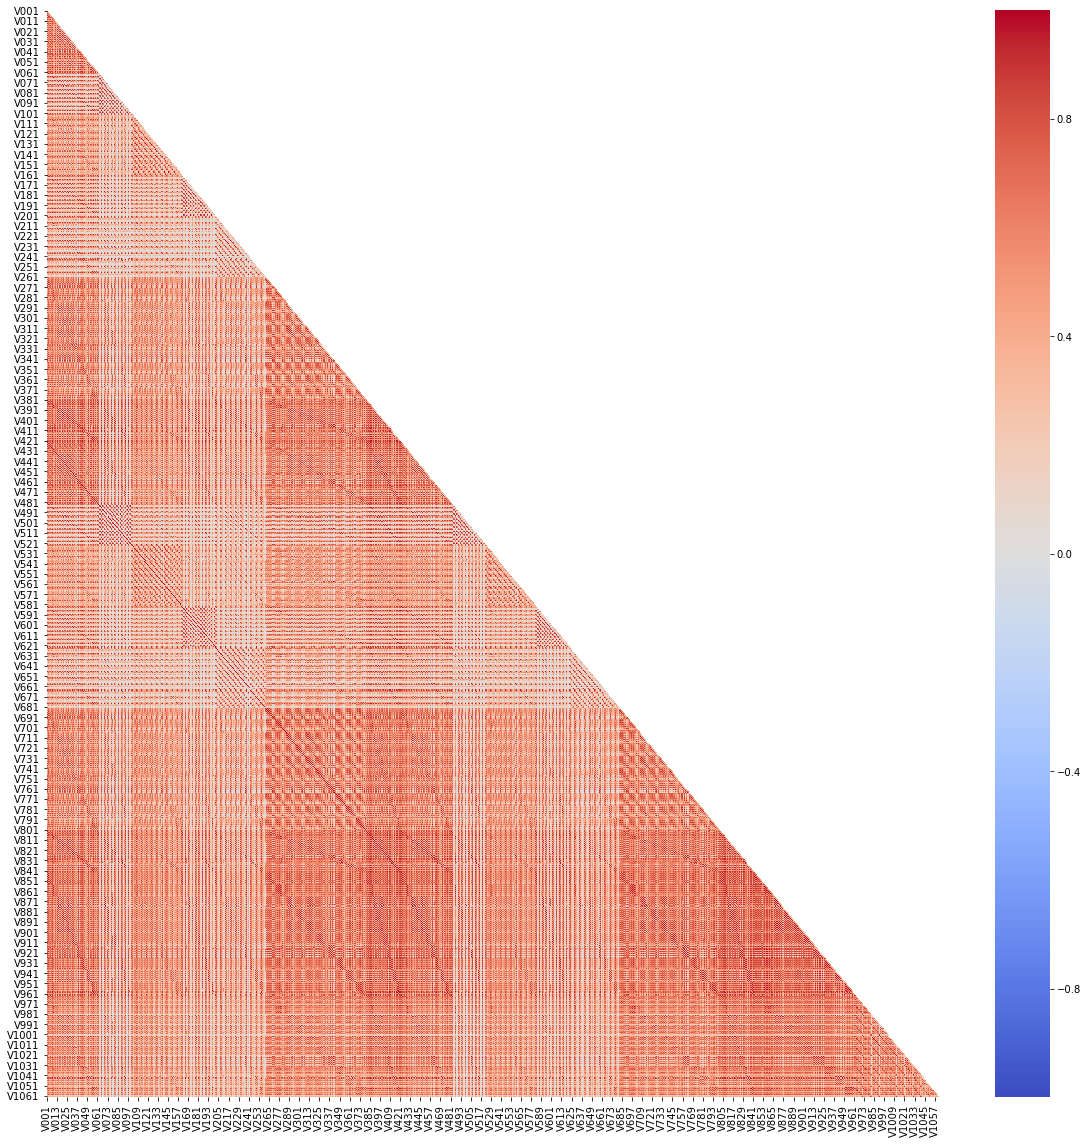

In [13]:
data_corr = data_no_geo.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(data_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

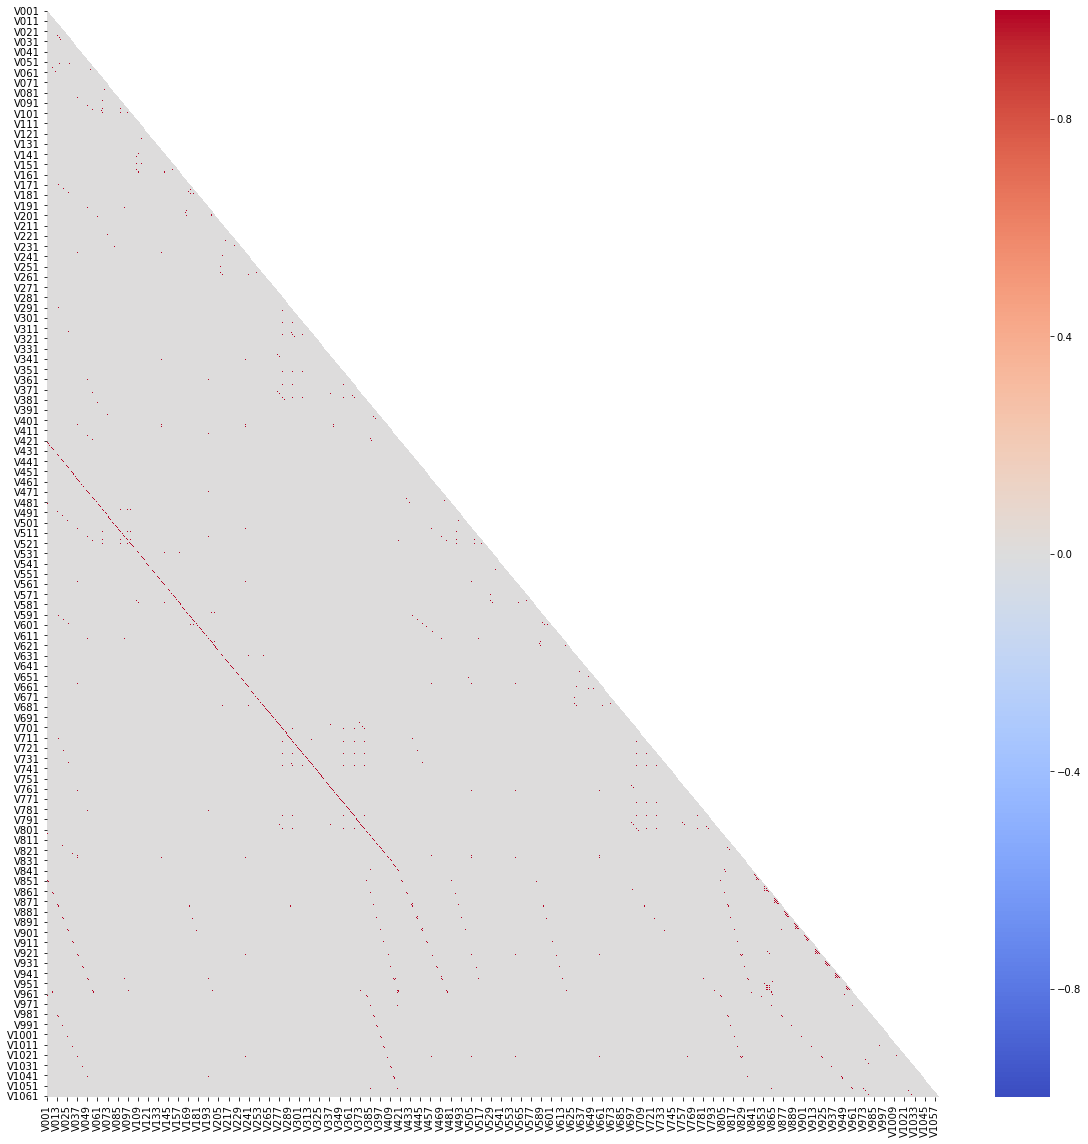

In [14]:
corr = data_corr.copy()
corr[np.abs(corr)<=0.99] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

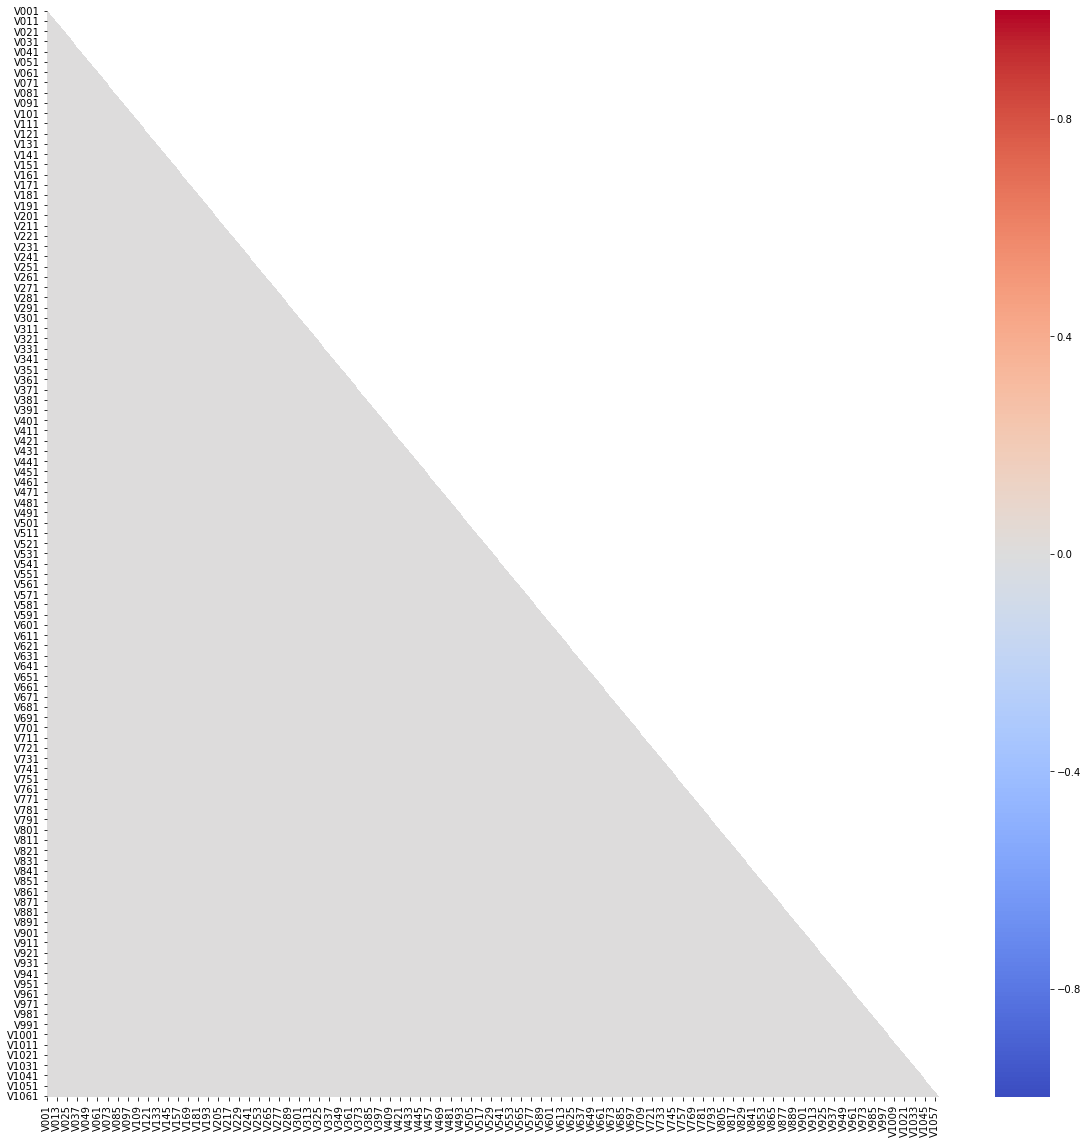

In [15]:
corr = data_corr.copy()
corr[np.abs(corr)< 1] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);